<a href="https://colab.research.google.com/github/Samuel-Mason-git/Recent-Projects/blob/main/Binary_Imagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification - Brain MRI Images for Brain Tumor Detection
This project focuses on classifying brain MRI images to detect the presence of brain tumors using binary classification. The workflow involves data preprocessing, building models using transfer learning, and evaluating their performance.


**Preprocessing**

  *   Understanding Data
  *   Visualising Data
  *   Checking for currupt Images
  *   Train, Test and Validation Splitting



**Model 0 - Transfer Learning - Imagenet - No Fine Tuning **

---

*   Training - - accuracy: 0.9805 - loss: 0.0851 - val_accuracy: 0.9219 - val_loss: 0.2416
*   Evaluation - loss :  0.240066 - accuracy :  0.921875
*   Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.89      0.93        37
  *   weighted avg       0.93      0.92      0.92        64

---

**Model 1 - Transfer Learning - Imagenet - Fine Tuning **

---

*   Training - - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.9062
*   Evaluation - loss :  0.28888 - accuracy :  0.921875
*   Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.86      0.93        37
      *   weighted avg       0.93      0.92      0.92        64
---




**Evaluation**
Both models achieved comparable accuracy on the test dataset, with a weighted average F1-score of 0.92. However, the fine-tuned model (Model 1) demonstrated better performance in terms of error reduction, as it predicted no false positives in the confusion matrix. Fine-tuning leveraged the pre-trained features more effectively, ensuring a robust classification of brain tumor presence.

In [ ]:
!kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam
from tqdm.notebook import tqdm
from PIL import Image
import sklearn
import pandas as pd
from os import listdir
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
with zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r') as zip_ref:
    zip_ref.extractall()
    zip_ref.close()

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 46% 7.00M/15.1M [00:00<00:00, 72.6MB/s]
100% 15.1M/15.1M [00:00<00:00, 116MB/s] 


## Checking for Currupted Images




*   No currupt Images were found




In [ ]:
def check_image(path):
    count = 0
    re_count = 0
    for filename in os.listdir(path):
      if filename.endswith(('.jpg', '.JPG', '.png')):
        file_path = os.path.join(path, filename)
        try:
            img = Image.open(file_path)
            img.verify()
            count += 1
        except (IOError, SyntaxError) as e:
            os.remove(file_path)
            re_count += 1
    print(f"Current Path: {path}")
    print(f"Number of images removed: {re_count}")

paths = ['/content/no', '/content/yes']
for path in paths:
  check_image(path)

Current Path: /content/no
Number of images removed: 0
Current Path: /content/yes
Number of images removed: 0


## Understanding our data
In the dataset we have:


*   2 Classes (Yes, No)
*   98 Images of no Tumor
*   155 Images of Tumor

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/no"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

for dirpath, dirnames, filenames in os.walk("/content/yes"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 98 images in '/content/no'.
There are 0 directories and 155 images in '/content/yes'.


# Preprocessing

## Create train, test and validation image sets

* Training Data: 189
* Testing Data: 64

In [ ]:
X=[]
y = []

path='/content/yes'
for i in tqdm(os.listdir(path)):
    image = os.path.join(path, i)
    img = cv2.imread(image)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(1)

path='/content/no'
for i in tqdm(os.listdir(path)):
    image = os.path.join(path, i)
    img = cv2.imread(image)
    if img is not None:
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(0)
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

X_train shape: (189, 224, 224, 3), y_train shape: (189, 2)
X_test shape: (64, 224, 224, 3), y_test shape: (64, 2)


# Model Transfer Learning - BGG19 & Imagenet


*   Not fine tuned
*   No image augmentation



In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,447,682 (100.89 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 235s 41s/step - accuracy: 0.5976 - loss: 0.7084 - val_accuracy: 0.7969 - val_loss: 0.4341 - learning_rate: 1.0000e-04
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 283s 51s/step - accuracy: 0.7268 - loss: 0.5530 - val_accuracy: 0.8281 - val_loss: 0.4167 - learning_rate: 1.0000e-04
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 255s 45s/step - accuracy: 0.7709 - loss: 0.4798 - val_accuracy: 0.8281 - val_loss: 0.3867 - learning_rate: 1.0000e-04
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 201s 35s/step - accuracy: 0.8164 - loss: 0.3597 - val_accuracy: 0.8906 - val_loss: 0.3772 - learning_rate: 1.0000e-04
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 209s 37s/step - accuracy: 0.8826 - loss: 0.3365 - val_accuracy: 0.8125 - val_loss: 0.3280 - learning_rate: 1.0000e-04
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 254s 35s/step - accuracy: 0.8399 - loss: 0.3201 - val_accuracy: 0.8750 - val_loss: 0.3630 - learning_rate: 1.0000e-04
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 207s 36s/step - accuracy: 0.8967 - loss:

In [ ]:
loss,test=model.evaluate(X_test,y_test)
print("loss : ",loss)
print("accuracy : ",test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 53s 27s/step - accuracy: 0.9271 - loss: 0.2404
loss :  0.24006690084934235
accuracy :  0.921875


<Axes: >

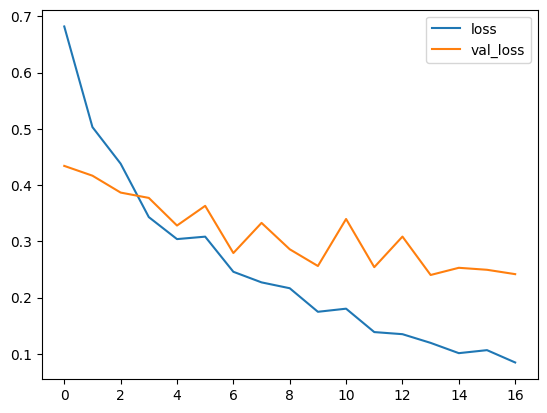

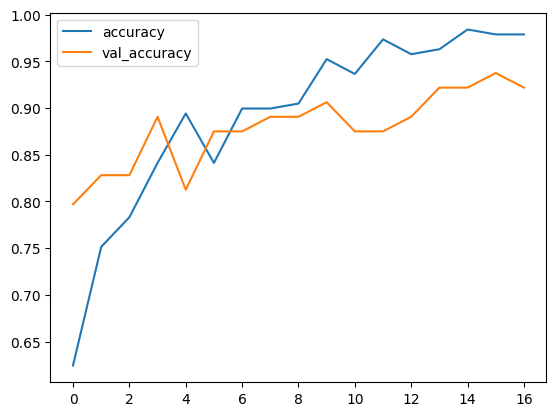

In [ ]:
import pandas as pd
ef=pd.DataFrame(history.history)
ef[['loss','val_loss']].plot()
ef[['accuracy','val_accuracy']].plot()

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 51s 24s/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.89      0.93        37

    accuracy                           0.92        64
   macro avg       0.92      0.93      0.92        64
weighted avg       0.93      0.92      0.92        64



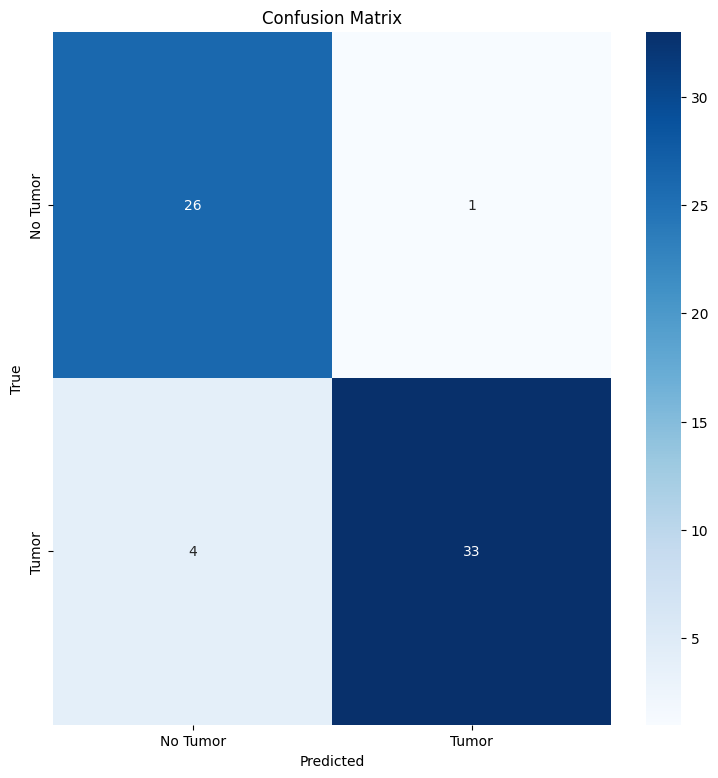

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 49
sample_images = X_test[:num_images]
sample_labels = y_test[:num_images]

y_pred_sample = model.predict(sample_images)
y_pred_sample = np.argmax(y_pred_sample, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 14s/step


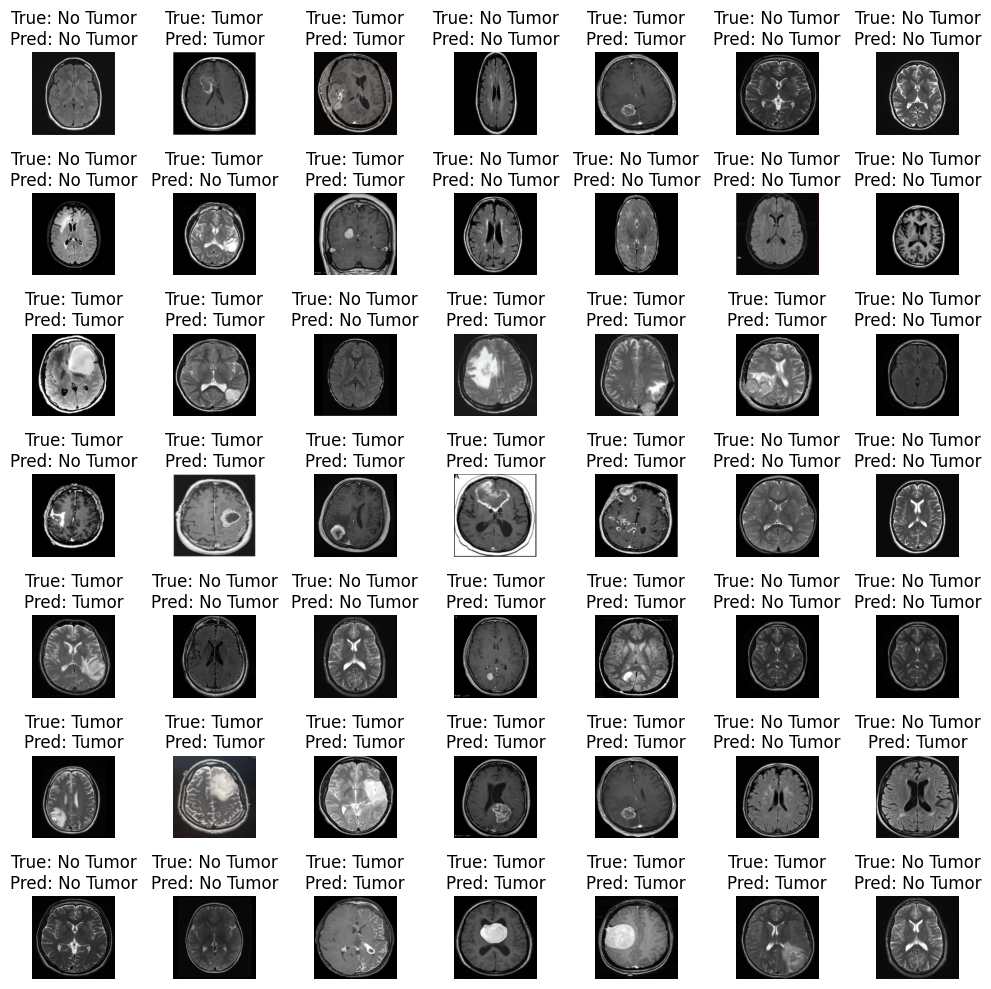

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(7, 7, i + 1)
    plt.imshow(sample_images[i])
    true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
    pred_label = 'Tumor' if y_pred_sample[i] == 1 else 'No Tumor'

    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Fine Tuning Model


*   Unfreeze top layers to retrain the base model with a lower learning rate.
*   Apply augmentation to the training and testing data.




In [ ]:
# Fine tune the model
for layer in base_model.layers[-10:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,447,682 (100.89 MB)

 Trainable params: 24,122,114 (92.02 MB)

 Non-trainable params: 2,325,568 (8.87 MB)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 349s 59s/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 0.9219 - val_loss: 0.2889
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 374s 58s/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.9375 - val_loss: 0.2841
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 388s 59s/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.9062 - val_loss: 0.2305


In [ ]:
loss,test=model.evaluate(X_test,y_test)
print("loss : ",loss)
print("accuracy : ",test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 52s 26s/step - accuracy: 0.9271 - loss: 0.2932
loss :  0.2888892889022827
accuracy :  0.921875


<Axes: >

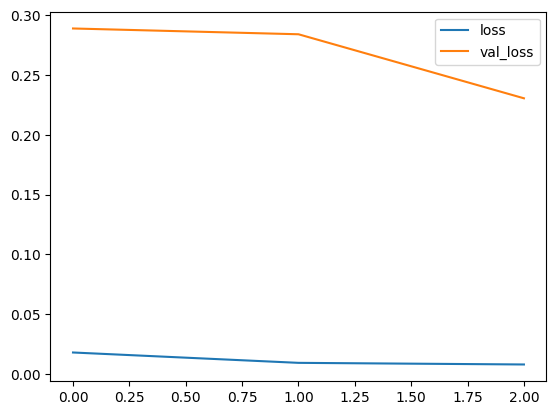

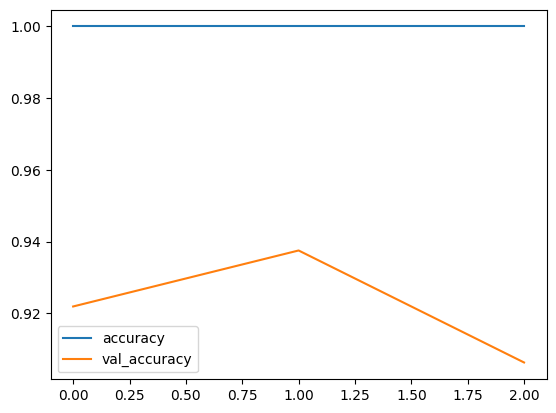

In [ ]:
import pandas as pd
ef=pd.DataFrame(history.history)
ef[['loss','val_loss']].plot()
ef[['accuracy','val_accuracy']].plot()

In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 52s 26s/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.86      0.93        37

    accuracy                           0.92        64
   macro avg       0.92      0.93      0.92        64
weighted avg       0.93      0.92      0.92        64



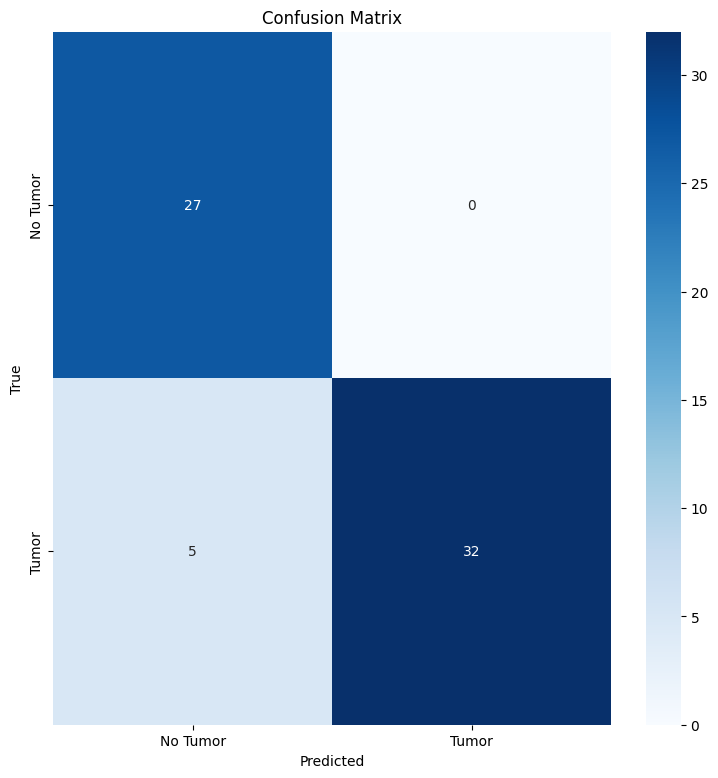

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_images = 49
sample_images = X_test[:num_images]
sample_labels = y_test[:num_images]

y_pred_sample = model.predict(sample_images)
y_pred_sample = np.argmax(y_pred_sample, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 14s/step


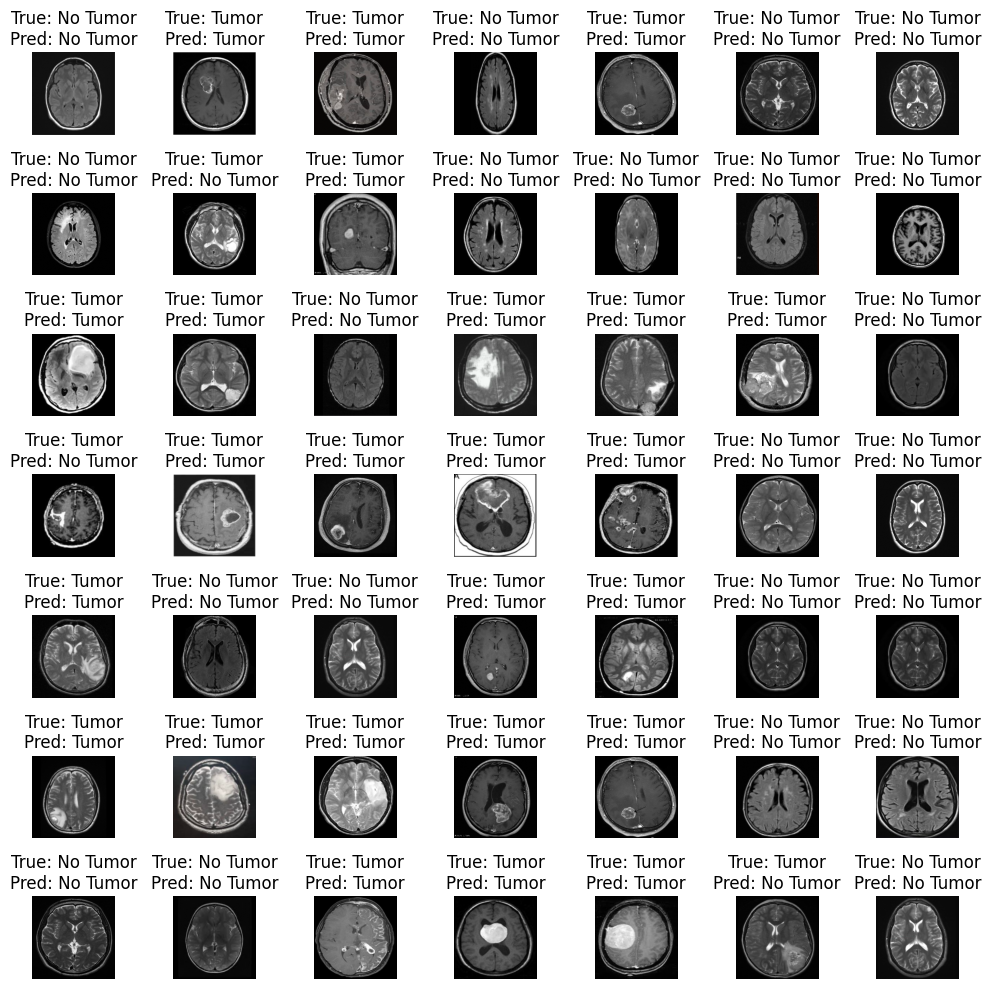

In [ ]:
plt.figure(figsize=(10, 10))

for i in range(num_images):
    plt.subplot(7, 7, i + 1)
    plt.imshow(sample_images[i])
    true_label = 'Tumor' if sample_labels[i] == 1 else 'No Tumor'
    pred_label = 'Tumor' if y_pred_sample[i] == 1 else 'No Tumor'

    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()